# Will it rain tomorrow

Das Ziel dieses Projektes ist es mithilfe der gegebenen Daten zu berechnen ob es morgen regnen wird.

Als Datensatz wurde eine Sammlung von australischen Wetterdaten genommen welche über mehrere Jahre gesammelt wurden.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from IPython.display import display, HTML

In [2]:
weatherData = pd.read_csv("data/weatherAUS.csv")

In [3]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
weatherData["Date"] = pd.to_datetime(weatherData["Date"])


Hier wird geschaut wie groß der anteil von leeren Datenzellen ist, wie man sieht gibt es ein paar die einen relativ großen anteil haben wie etwa die Sunshine column welche zu fast 50% leer ist. weswegen sie entfernt wird.

In [5]:
weatherData.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

Ein paar der columns haben einen relativ großen anteil an Nullwerten weswegen sie entfernt werden

In [6]:
weatherData = weatherData.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

In [7]:
weatherData.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
115787,2012-04-12,PearceRAAF,9.7,32.9,0.0,NNW,35.0,S,SW,11.0,19.0,47.0,30.0,1021.6,1018.8,18.9,29.0,No,No
130053,2009-02-01,Hobart,12.2,20.5,0.0,SE,33.0,S,ESE,9.0,22.0,58.0,43.0,1026.3,1023.4,14.4,19.8,No,No
105838,2009-10-04,Woomera,7.2,23.0,0.0,SSW,43.0,NNE,W,7.0,15.0,57.0,25.0,1022.8,1021.1,12.6,21.2,No,No
58419,2009-09-04,Bendigo,1.4,15.2,1.4,WNW,61.0,NW,NW,13.0,26.0,81.0,61.0,1012.9,1011.4,10.0,12.1,Yes,Yes
69804,2015-11-15,Melbourne,NaN,NaN,NaN,SE,33.0,SSE,SSE,20.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23309,2015-03-30,NorfolkIsland,19.1,24.0,0.0,SSE,33.0,SE,SE,17.0,19.0,65.0,54.0,1022.4,1020.6,22.4,23.4,No,No
37026,2010-05-13,WaggaWagga,0.1,16.4,0.0,SW,30.0,NNW,WSW,6.0,19.0,86.0,50.0,1023.9,1020.2,5.9,16.4,No,No
70614,2009-08-10,Mildura,7.9,19.7,0.0,ENE,44.0,NE,NE,17.0,22.0,32.0,21.0,1011.4,1005.4,12.2,18.6,No,No
11215,2015-02-25,CoffsHarbour,20.6,26.9,9.4,NaN,NaN,SW,S,17.0,20.0,83.0,75.0,NaN,1012.6,23.6,25.8,Yes,No
101659,2015-01-14,MountGambier,15.8,19.9,2.4,SW,52.0,SSW,SW,24.0,31.0,90.0,67.0,1007.7,1008.6,16.2,18.1,Yes,No


## Graphs


unten sehen wir eine reihe von graphen welche zeigen sollen welche Daten sich im Datensatz befindet.
Um eine bessere Übersicht zu bekommen haben wir nur Daten von 2016 genommen um beispielsweiße den Verlauf von einem Jahr zu sehen


In [8]:
dataFrom2016 = weatherData.loc[(weatherData['Date'] > "2016-01-01") & (weatherData['Date'] <= "2016-12-31")]

In [9]:
dataFrom2016

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2499,2016-01-02,Albury,20.9,33.6,0.4,SSE,50.0,SSE,SE,9.0,17.0,54.0,30.0,1011.1,1008.4,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,ENE,48.0,ESE,ENE,11.0,39.0,62.0,67.0,1014.0,1014.8,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,SSE,39.0,SE,SSE,9.0,17.0,74.0,65.0,1017.9,1016.5,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,ENE,31.0,SE,SSE,6.0,9.0,92.0,63.0,1016.3,1013.9,17.2,22.2,Yes,No
2503,2016-01-06,Albury,17.0,28.1,0.2,SE,39.0,SSE,ENE,9.0,11.0,76.0,52.0,1014.6,1012.6,20.3,25.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145279,2016-12-27,Uluru,22.1,35.8,63.8,WNW,43.0,WNW,W,17.0,31.0,77.0,41.0,997.8,995.2,26.0,33.5,Yes,No
145280,2016-12-28,Uluru,22.6,36.8,0.0,NW,50.0,NW,W,30.0,15.0,63.0,39.0,1000.0,998.8,29.7,34.0,No,No
145281,2016-12-29,Uluru,23.2,38.0,0.0,SSW,33.0,S,WSW,17.0,17.0,25.0,14.0,1004.4,1001.0,28.7,36.4,No,No
145282,2016-12-30,Uluru,19.7,37.0,0.0,E,37.0,ESE,W,22.0,6.0,30.0,23.0,1004.6,1000.9,28.2,35.1,No,No


<AxesSubplot:xlabel='Date', ylabel='MaxTemp'>

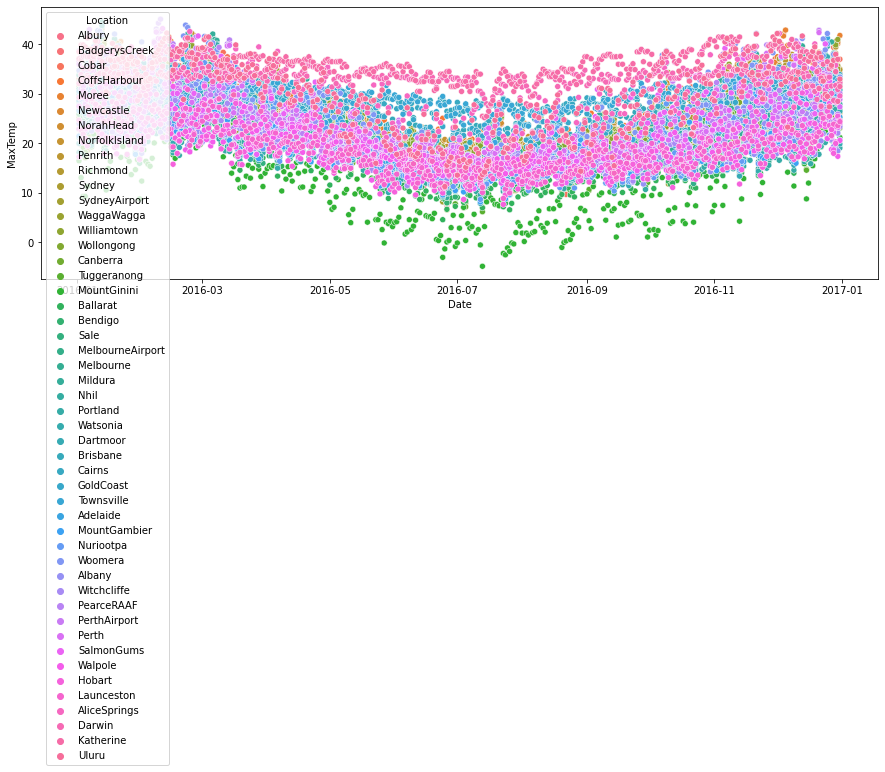

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = dataFrom2016,y="MaxTemp", x='Date', hue='Location')

Die oben gezeigte Grafik zeigt die Temperatur im verlauf von einem Jahr in jeder Region in der Daten gesammelt wurden. Man sieht hierbei das die Temperatur im ganzen Land im Winter sinkt, besonder sin Ballarat ist die Temperatur besonders niedrig während sie in Albury fast das ganze Jahr über warm bleibt.

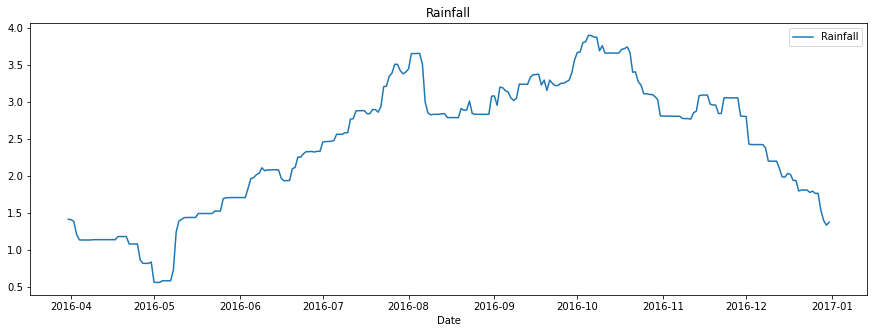

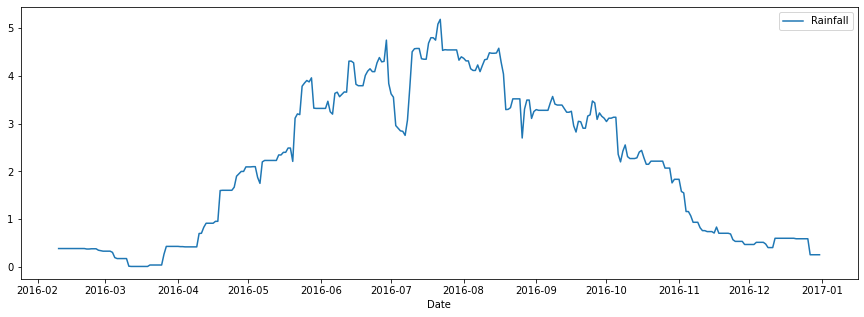

In [26]:
albury2016 = dataFrom2016.loc[dataFrom2016["Location"]=="Albury"];
rainfall = albury2016[["Date", "Rainfall"]]
rainfall.set_index('Date',inplace=True)
plt.figure(figsize=(15,5))
plt.title("Rainfall")
sns.lineplot(data = rainfall.rolling(window=90).mean() , dashes=False)

Perth = dataFrom2016.loc[dataFrom2016["Location"]=="Perth"];
rainfall = Perth[["Date", "Rainfall"]]
rainfall.set_index('Date',inplace=True)
plt.figure(figsize=(15,5))
sns.lineplot(data = rainfall.rolling(window=40).mean() , dashes=False)


def clear():
    js = "<script>$('.output_scroll').removeClass('output_scroll')</script>"
    display(HTML(js))

    

Man sieht hier gut das sich die Regenmenge über ein Jahr verändert, besonders in perth verändert sich die Regenmenge besonders stark über ein Jahr und es zeigt sich das besonders im Juli und August am meisten Regen fällt

In [12]:
weatherData['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weatherData['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)



weatherData["year"] = weatherData.Date.dt.year;
weatherData["month"] = weatherData.Date.dt.month;
weatherData["day"] = weatherData.Date.dt.day;



<AxesSubplot:>

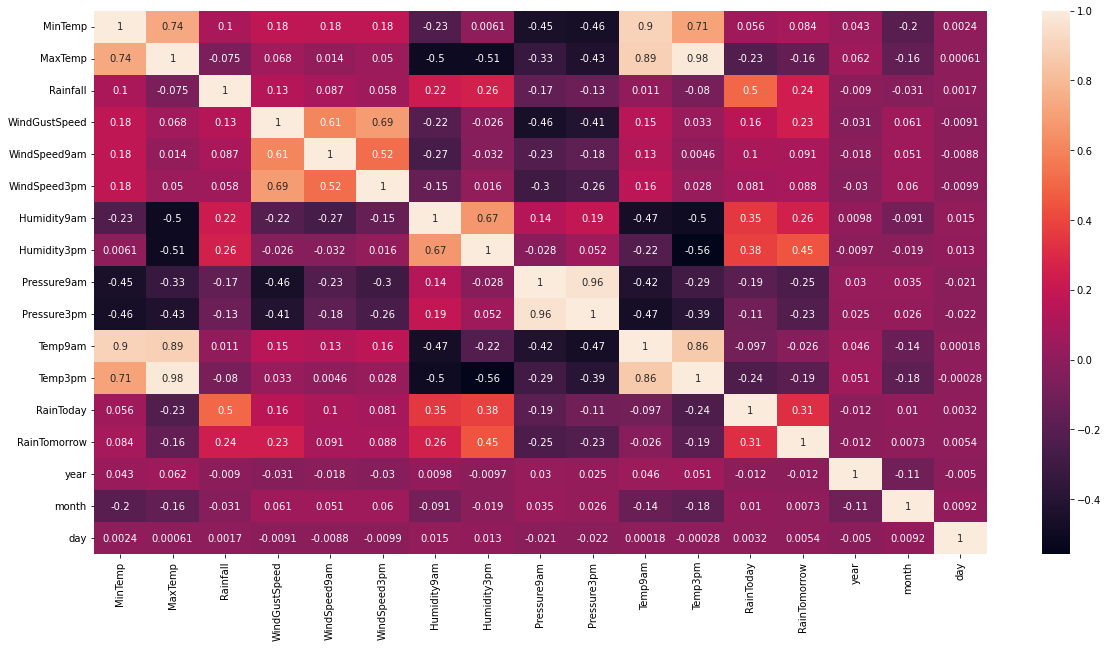

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(weatherData.corr(), annot = True)

Die Heatmap zeigt die Correlation zwischen den einzelnen Tabellen werten an, Wie man sieht gibt es zwischen den meisten nur eine geringe Correlation.

Wichtig ist die Correlation zwischen RainTomorrow und dem Rest.
Die höchste Correlation wird bei der Humidity3pm und der RainToday column. 


## Preparing the Data for model creation

zuallerst werden alle null werte und das date gelöscht da null werte zu problemen führen und das date nicht gebraucht wird.

In [14]:
weatherData =weatherData.drop(columns=['Date'],axis=1)
weatherData = weatherData.dropna(how='any')
weatherData.shape

(112925, 21)

Da ein paar der Columns strings sind und die models nicht damit arbeiten könnnen müssen diese in integers umgewandet werden was mit LabelEncoder gemacht wird.

In [15]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


weatherData["Location"] = le.fit_transform(weatherData["Location"])
weatherData["WindDir9am"]= le.fit_transform(weatherData["WindDir9am"])
weatherData["WindDir3pm"]= le.fit_transform(weatherData["WindDir3pm"])
weatherData["WindGustDir"] = le.fit_transform(weatherData["WindGustDir"])


    
weatherData.sample(10)


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
45038,42,16.8,23.8,0.0,4,35.0,5,4,9.0,17.0,...,67.0,1018.7,1015.0,21.6,22.2,0.0,0.0,2015,12,25
141281,12,18.8,32.0,0.0,5,39.0,2,3,9.0,26.0,...,47.0,1016.4,1012.5,25.6,30.5,0.0,0.0,2014,9,7
58001,4,16.3,28.8,0.0,5,54.0,3,6,22.0,37.0,...,52.0,1008.2,1005.5,20.1,28.1,0.0,1.0,2017,2,5
64962,18,20.2,25.5,6.8,3,46.0,6,11,15.0,20.0,...,90.0,1011.0,1010.4,21.2,20.6,1.0,1.0,2011,2,11
76250,29,6.4,15.0,0.0,3,31.0,3,3,7.0,13.0,...,61.0,1024.5,1020.2,7.6,14.2,0.0,0.0,2012,7,24
4640,3,6.2,23.7,0.0,14,54.0,3,14,7.0,30.0,...,36.0,1010.4,1007.4,14.2,22.0,0.0,0.0,2013,8,17
41608,40,14.0,31.2,0.0,0,41.0,3,1,7.0,24.0,...,36.0,1014.8,1011.0,22.9,28.8,0.0,0.0,2014,11,30
29575,30,17.9,19.0,0.0,11,24.0,15,10,11.0,13.0,...,97.0,1017.2,1016.6,18.2,18.4,0.0,1.0,2015,11,3
106216,43,7.5,18.5,0.0,8,30.0,8,15,13.0,7.0,...,33.0,1023.0,1020.5,11.9,18.1,0.0,0.0,2010,10,17
101422,21,9.9,16.5,0.2,15,39.0,14,7,9.0,9.0,...,94.0,1016.7,1012.8,15.5,16.3,0.0,1.0,2014,5,22


In [16]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(weatherData)
weatherData = pd.DataFrame(scaler.transform(weatherData), index=weatherData.index, columns=weatherData.columns)



Bevor wir unsere models trainieren müssen wir überlegen welche Columns verwendet werden.
dafür suchen wir zuerst die Column raus welche berechnet werden soll, was die RainTomorrow column ist.

danach nehmen wir den SelectKBest algorithmus welcher berechnen soll welche columns am besten geeigent sind um ein Model für RainTomorrow.

Auffallend ist hierbei dass Humidity3pm nicht verwendet wird obwohl es eigentlich laut dem Graphen von oben die höchste Correlation mit RainTomorrow hat.


In [17]:
from sklearn.feature_selection import SelectKBest, chi2
X = weatherData.loc[:,weatherData.columns!='RainTomorrow']
y = weatherData[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


Als nächstes mussten die Columns ausgewählt werden. Dafür wählen wir zuerst die die uns der letzte Codeblock vorgeschlagen hat und noch ein paar andere welche wir durch testen gewählt haben.

In [39]:

X = weatherData[['Location','Humidity3pm','WindDir9am','WindGustDir','RainToday','Pressure3pm','month']] # interestingly pressure3pm is very important
y = weatherData[['RainTomorrow']]

## Modelle trainieren

im folgenden Trainieren wir 3 Modelle und vergleichen diese auf genauigkeit und geschwindigkeit

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

/tmp/ipykernel_3591/874727560.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train,y_train)


Accuracy : 0.8461320487390196
Time taken : 4.529054164886475


In [21]:

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)



Accuracy : 0.778797109662794
Time taken : 0.32189130783081055


In [41]:
#Support Vector Machine
from sklearn import svm
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train,y_train)
y_pred = clf_svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)


/home/paule/.conda/envs/leoenv/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.842306602436951
Time taken : 89.27846336364746


In [40]:
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn.metrics import confusion_matrix # to extract confusion matrix
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train,y_train)
prediction_lr = model_lr.predict(X_test)
score = accuracy_score(y_test,prediction_lr)
print('Accuracy - Logistic Regression:',score)
score = accuracy_score(y_test,y_pred)
print('Time taken :' , time.time()-t0)


/home/paule/.conda/envs/leoenv/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy - Logistic Regression: 0.8385165769339756
Time taken : 0.4479339122772217


In [36]:
sns.heatmap(cm,annot=True,linecolor="red",fmt=".0f",ax=ax)

NameError: name 'ax' is not defined

Ein keiner Ausschnitt aus dem decision tree:


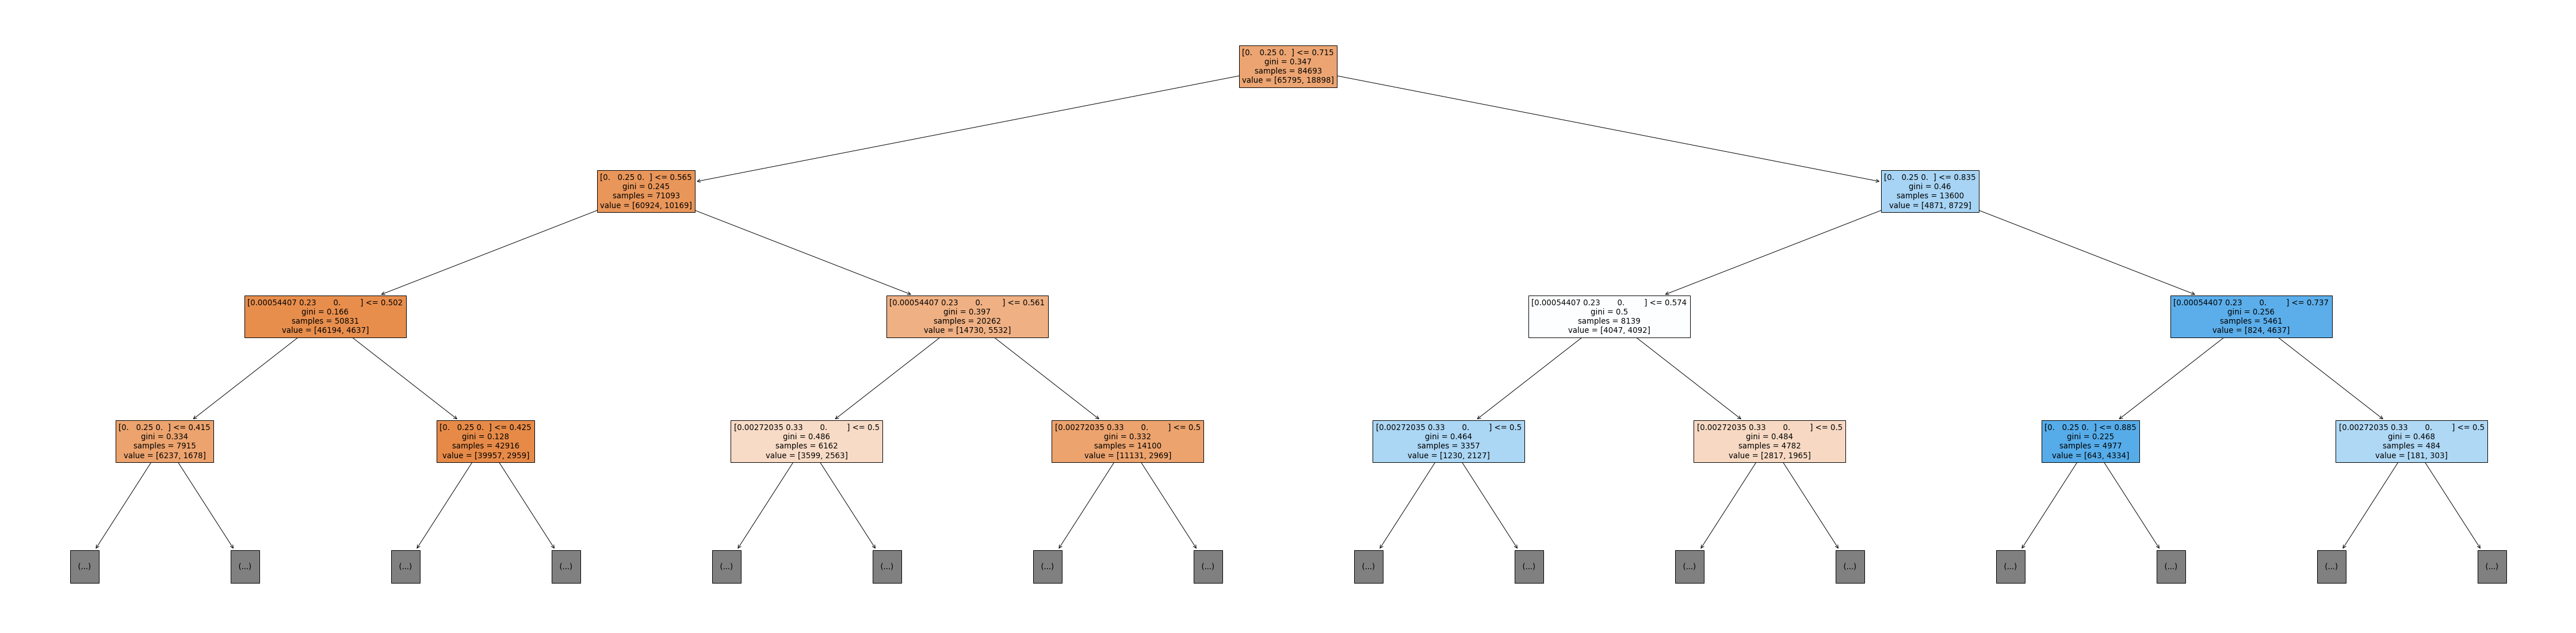

In [30]:

from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(clf_dt, feature_names=X_new, max_depth=3, filled=True);

## Ergebnis

wie man unten sieht sind die RandomForestClassifier und der   Support Vector Machine am genausten brauchen aber auch die längste Zeit zum berechnen, besonders der Support Vector braucht mit 36Sekunden mit abstand am längsten zu berechnen.

am besten ist aber dennoch der RandomForestClassifiert mit 85% genauigkeit.


### RandomForestClassifier

Accuracy : 0.8498967475477542

Time taken : 2.452030897140503


### Decision Tree Classifier

Accuracy : 0.7817501290655653

Time taken : 0.17644739151000977

### Support Vector Machine

Accuracy : 0.8422818791946308

Time taken : 36.38693618774414


### Logical Regression

Accuracy: 0.8385165769339756
Time taken : 0.4479339122772217


### Genaugikeit erhöhen

Die Genauigkeit zu erhöhen könnte man am besten damit erzielen indem man historische Daten verwendet und schaut ob es scho vor 1,2 oder mehr jahren zu diesem Zeitpunkt geregnet hat. Man könnte auch versuchen ein Model zu erstellen welches die Regensaision mit einbezieht in die Berechnung für die regenwahrscheinlichkeit



## Unterschiede zwischen den Algorithmen

Ein Random Forest Classifier ist genauer als der Decision Tree Classifier, braucht aber dafür mehr Zeit.

Der Decision Tree Classifier hingegen ist ungenauer, dafür schneller und kann besser mit großen Datensetz arbeiten.

SVM hingegen ist Speicher effizient, performt aber nicht so gut mit großen Datensets. Außerdem liefert und SVM keine direkten Wahrscheinlichkeitsschätzungen.


In [27]:
clear()